
<h1><center>Twitter Classification of Nepal earthquake tweets</center></h1>
<h3 style="font-size:25px">Microblogging sites like Twitter are increasingly being used for aiding relief operations 
during various mass emergencies.  A lot of critical situational information is posted on microblogging
sites during disaster events. However, messages posted on microblogging sites often contain rumors and overstated facts.
In such situations, identification of factual or fact-checkable tweets, i.e., tweets that report some
relevant and verifiable fact (other than sympathy or prayer) is extremely important for effective coordination 
of post-disaster relief operations. Additionally, cross verification of such critical information is a practical necessity  
and resource availability. Hence, automated Machine Learning  techniques are needed to identify the tweets 
that talk about the need of resources or availability of resources.</h3>
<br>
<br>


<h1 style="color:orange">Prerequisites</h1>
<h3>We would highly recommend that before the hack night you have some kind of toolchain and development environment already installed and ready. If you have no idea where to start with this, try a combination like:<br><br>
    Python<br>
    scikit-learn / sklearn<br>
    Pandas<br>
    NumPy<br>
    matplotlib<br>
 <br> 
An environment to work in - something like Jupyter or Spyder
For Linux people, your package manager should be able to handle all of this. If it somehow can't, see if you can at least install Python and pip and then use pip to install the above packages.</h3>

<br>
<h1 style="color:orange">Class Description:</h1>
<h3>
0:The tweet doesn’t talk about any resources needed or available(Irrelevant tweets)<br>
1:The tweet mentions a resource that is needed (Need Tweets)<br>
2:The tweet mentions a resource that is available(Availability tweets)<br></h3>

# <h1>Importing Libraries for Data Manipulation and Representation</h1>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from wordcloud import WordCloud


<h1>Loading the Dataset</h1>

In [3]:
df=pd.read_csv(r"C:\Users\Shreya katoch\Desktop\ML\Twitter Classification of nepal earthquakes tweets\Train.csv", encoding="latin1")

<h1>Let's go through the DataSet</h1><br>
<h2>Top 10 rows of DataSet</h2>

In [4]:
df.head(10)

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


<h2>Bottom 10 rows of DataSet</h2>

In [5]:
df.tail(10)

,TweetClass,TweetID,TweetText
18223,2,592684009563549696,Earthquake Nepal Indian Army takes up major re...
18224,2,592683279188361217,National disaster helpline number made operati...
18225,2,592694344655699968,Israel sends humanitarian aid to Nepal In the ...
18226,2,592697492422144000,#UttarPradesh \\u200bgovt sends buses to #Nepa...
18227,2,592696857815572481,Sikh organization to send lakh food packets to...
18228,2,592697535271174145,#Earthquake in #Nepal #GoldenTemple Temple to ...
18229,2,592697135390416899,Nepal Earthquake Eerts from AIIMS Safdarjung H...
18230,2,592698989507715075,UNHCR rushes plastic sheeting and solar-powere...
18231,1,5644654646545646,Urgent medical need food water needed medicine...
18232,2,543533654345435,Available plenty medicine food water


In [6]:
df.shape # Shows the Shape of the Dataset

(18233, 3)

In [7]:
df.columns # Display the Columns in DataSet

Index(['TweetClass', 'TweetID', 'TweetText'], dtype='object')

In [8]:

df.describe() # It describe about the basic Statistics

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [9]:
df['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

<h2>
Checking for Null Values</h2>

In [10]:
df.isnull().sum()

TweetClass    0
TweetID       0
TweetText     9
dtype: int64

<h2>
Checking for Null Values</h2>

In [11]:
df.duplicated().sum()

0

In [12]:
x = df.duplicated()
type(x)

pandas.core.series.Series

In [13]:
x.value_counts()

False    18233
dtype: int64

<h1>By using the Missingno Library we are checking Null Values</h1>

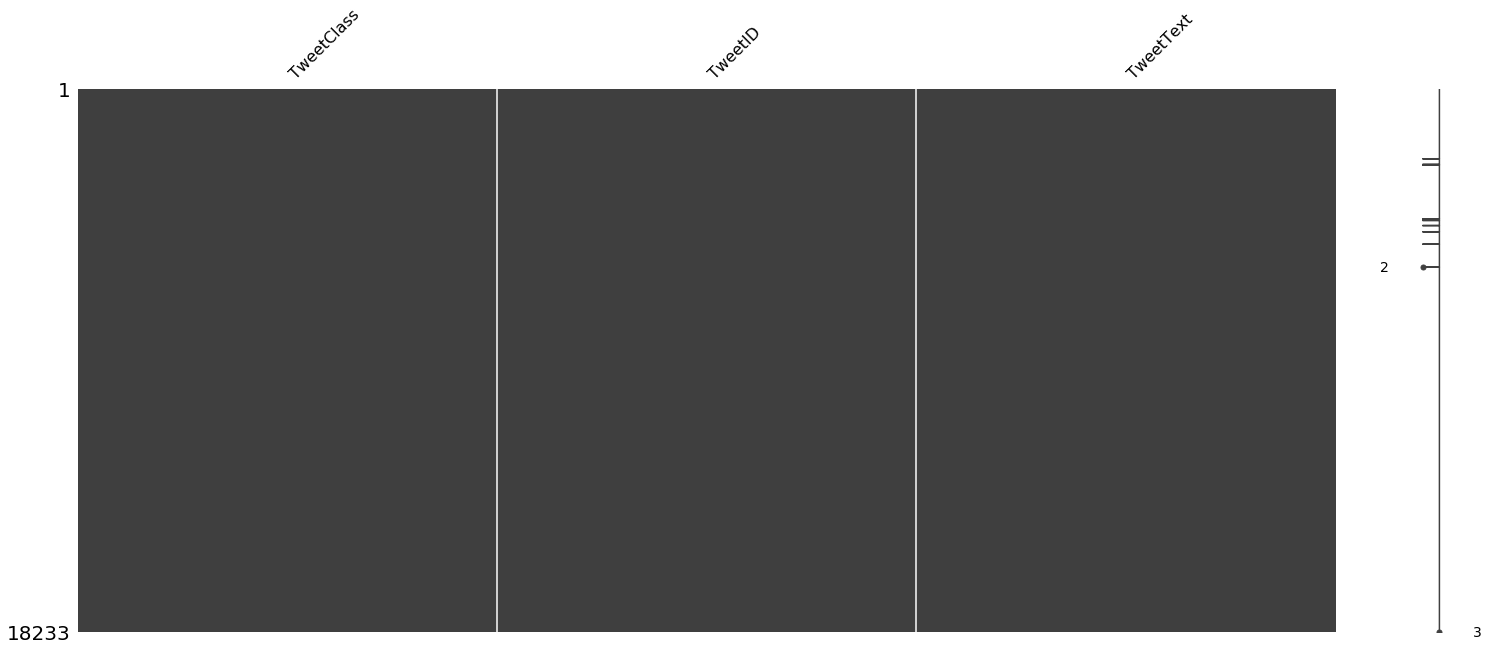

In [14]:

msno.matrix(df)

<h2>From this we Analyse that there will be no Missing Values</h2>

In [15]:
df['TweetClass'].value_counts()

0    17370
2      664
1      199
Name: TweetClass, dtype: int64

<h2>Mean Of Tweet Character Per Tweet.</h2>

In [16]:
mean_df = (df.groupby('TweetClass')['TweetText'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_characters_per_tweet'))
print(mean_df)

   TweetClass  mean_characters_per_tweet
0           0                  92.656817
1           1                  99.130653
2           2                 103.030120


In [17]:
new_df=df.drop_duplicates()
new_df.describe()

,TweetClass,TweetID
count,18233.000000,1.823300e+04
mean,0.083749,5.923055e+17
std,0.386754,6.178048e+15
min,0.000000,5.435337e+14
25%,0.000000,5.921631e+17
50%,0.000000,5.925189e+17
75%,0.000000,5.926002e+17
max,2.000000,5.927001e+17


In [18]:
irrelevant_df=df[df['TweetClass']==0]
need_df=df[df['TweetClass']==1]
available_df=df[df['TweetClass']==2]
print(irrelevant_df.shape)
print(need_df.shape)
print(available_df.shape)

(17370, 3)
(199, 3)
(664, 3)


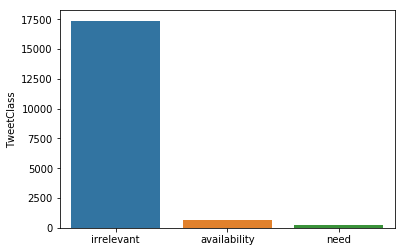

In [19]:

sns.barplot(x = ["irrelevant", 'availability','need'], y = df['TweetClass'].value_counts(), data=df)

In [20]:
need_df.head(10) #needs tweets

,TweetClass,TweetID,TweetText
17370,1,591922042481479680,Nepal seeks mobile medical assistance from India
17371,1,591979790627840000,Nepalis r w/o water &amp electricity Water is ...
17372,1,591985311665684480,The wounded and untimely families need to take...
17373,1,591989264256106499,they are in search of blood donors for the peo...
17374,1,591987020924260354,Walked all around central &amp old KTM.Shops o...
17375,1,591988336090173440,Food First Aid &amp Tents would be the princip...
17376,1,591985786880327682,RightWingers of ALL religions must keep away f...
17377,1,591992896485597184,Lac Rail Neer bottles is not what Nepal needs ...
17378,1,591995052169105408,Need more resources and personnel from Army fo...
17379,1,591996373869826048,India could surely despatch -4 Field Ambulance...


<h2>These tweets shows about which needs Availability:</h2>

In [21]:
available_df.head(10) # Avaibility Tweets

,TweetClass,TweetID,TweetText
17568,2,591915875638325248,Indian Prime Minister Narendra Modi has announ...
17569,2,591933551798419456,Phone from NTC does not take money when you ca...
17570,2,591939270673182721,India has sent 5 helicopters for relief and re...
17571,2,591968116919410690,NDRF personnel relief material was sent to Nep...
17572,2,591974898139987968,#SriLanka to fly emergency medical help food t...
17573,2,591978159102435328,Â· Hospital Fire Brigade and Blood Banks Name ...
17574,2,591978910713139202,Just electricity is available at Shankhamul ar...
17575,2,591975873009582080,Indian Railways Ministry sending one lakh Rail...
17576,2,591976580232052736,Amount of supplies may be used for more than d...
17577,2,591975888494854145,Haryana govt to airlift 000 food packets tomor...


<h2>These Tweets shows about the Avaibility and for Helping</h2>

In [22]:
irrelevant_df.head(10) # Irrelevant Tweets

,TweetClass,TweetID,TweetText
0,0,591764470197723137,#Nepal #news Adding to Bhutanese Refugees Bhut...
1,0,591779538046218240,The massacre of people's movement says peace a...
2,0,591728244925210624,I'm lonely maybe you're going to die without c...
3,0,591774433926193152,#nepal #news 6 billion collection collection 1...
4,0,591764472651386882,#Nepal #news Indian proposal to crash airport ...
5,0,591751543025569793,God also ran away for money after the poor lis...
6,0,591727216267890688,Someone feels like a tile to see
7,0,591739000001470464,The boys began to write English passage. I - taw
8,0,591753691084038146,I will not go away it's not going to be broken...
9,0,591747428358881282,Gaurab Sir


<h2>Segmenting and Visualizing the Tweets</h2>

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

irrelevant_vect=CountVectorizer(stop_words='english') #Filtering non-relevent Tweets
need_vect=CountVectorizer(stop_words='english') # Filtering Needing Tweets
available_vect=CountVectorizer(stop_words='english') # Filtering Availability Tweets
irrelevant_dtm=irrelevant_vect.fit_transform(irrelevant_df['TweetText'].values.astype('U')) #Removing: Stop word in Irrelevant tweets like a,is,the,you...
need_dtm=need_vect.fit_transform(need_df['TweetText'].values.astype('U')) # Removing Stop word in Need Tweets
available_dtm=available_vect.fit_transform(available_df['TweetText'].values.astype('U')) # Removing Stop word in Available Tweets 



irrelevant_word=irrelevant_vect.get_feature_names()
irrelevant_freqs=irrelevant_dtm.sum(axis=0).A1
#print(irrelevant_freqs)
irrelevant_result=dict(zip(irrelevant_word,irrelevant_freqs))
print(len(irrelevant_word))

16177


In [24]:
need_word=need_vect.get_feature_names()
need_freqs=need_dtm.sum(axis=0).A1
need_result=dict(zip(need_word,need_freqs))
print(len(need_word))


758


In [25]:
available_word=available_vect.get_feature_names()
available_freqs=available_dtm.sum(axis=0).A1
available_result=dict(zip(available_word,available_freqs))
print(len(available_word))

1577


#### <h2>Visualizing through WordCloud</h2>

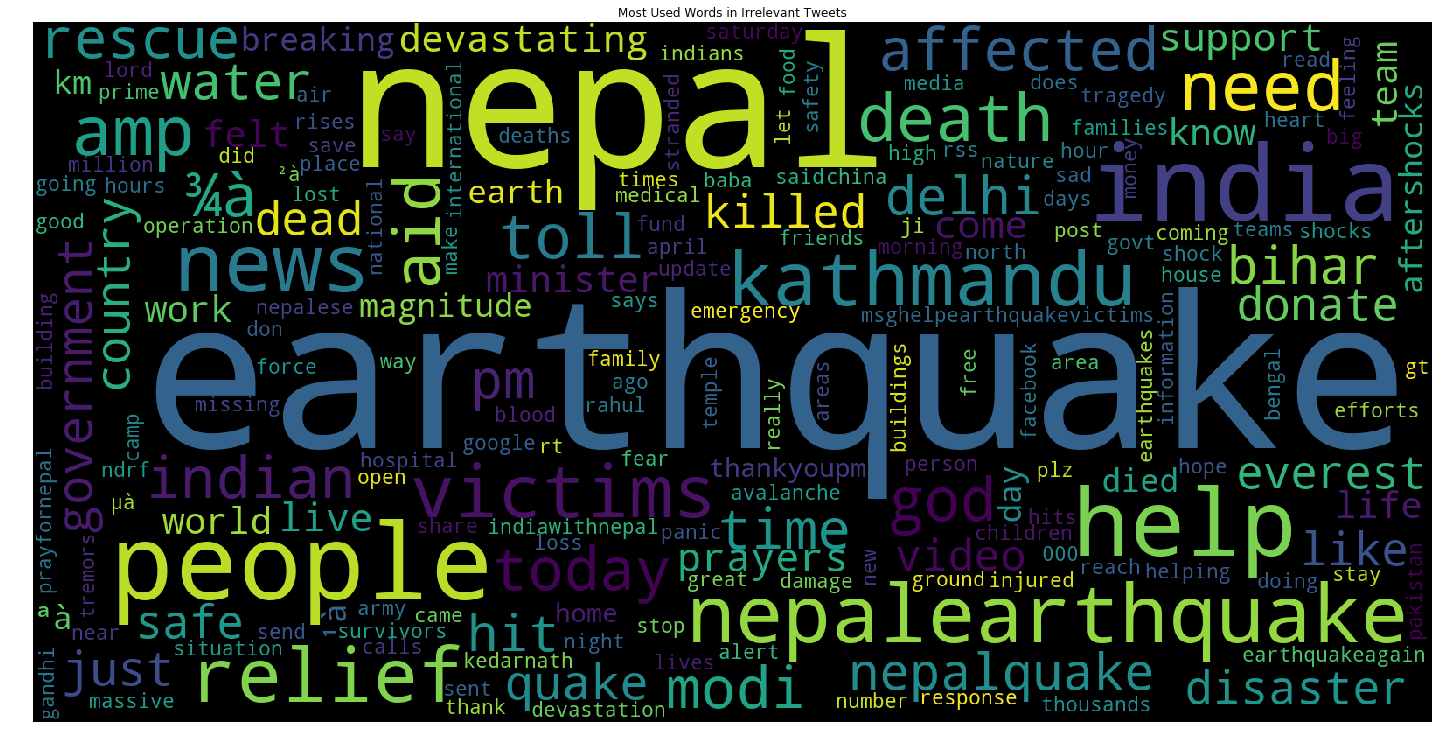

In [26]:
wordcloud=WordCloud(background_color='black',
                   width=1600,
                   height=800).generate_from_frequencies(irrelevant_result)
fig=plt.figure(figsize=(25,10))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.title("Most Used Words in Irrelevant Tweets")
#fig.savefig("Irrelevant_wordcloud.png")
plt.show()

<h3>Now we can Analyse that these are the most frequently used words in the Irrelevant tweets.</h3>

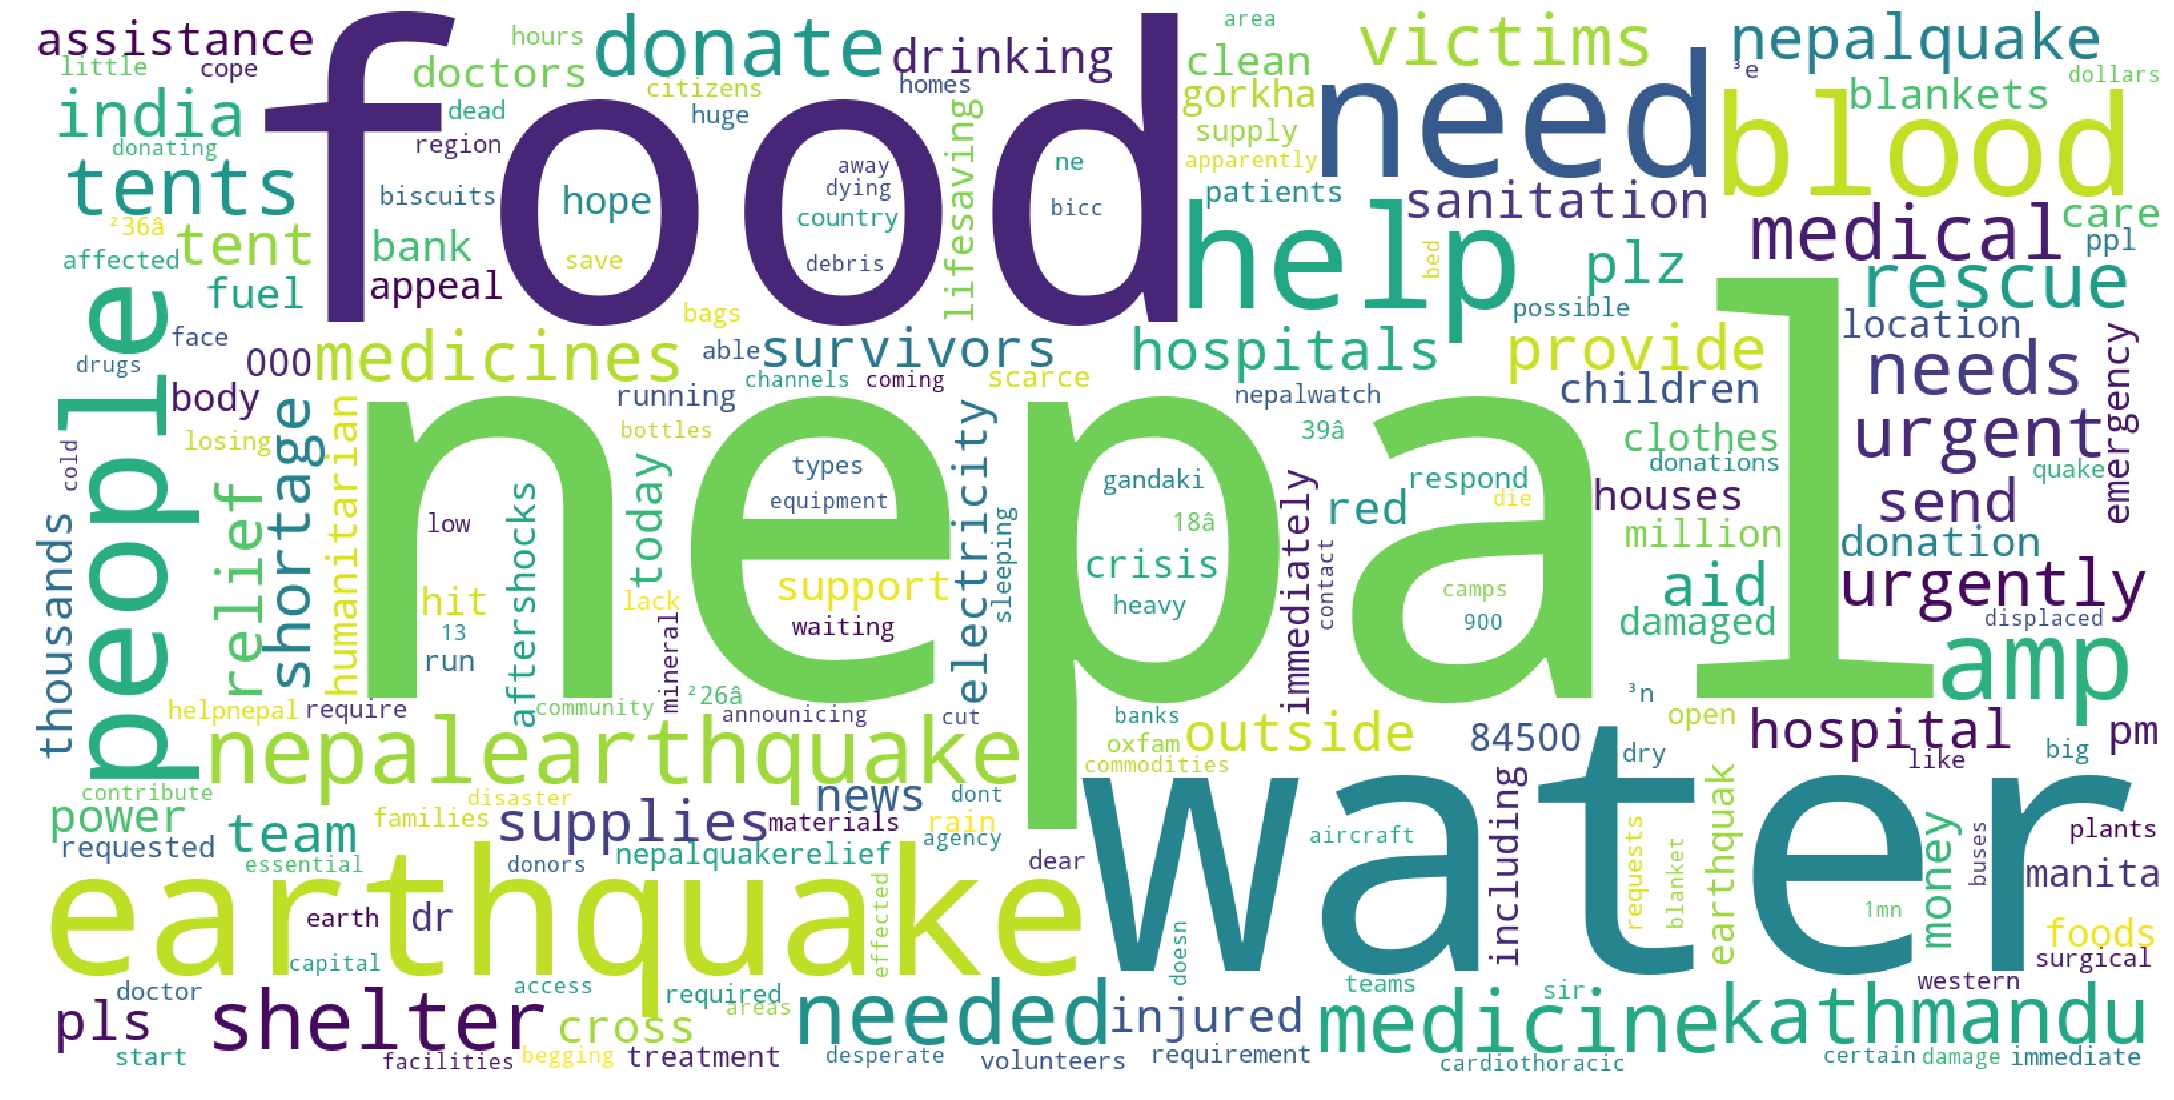

In [27]:
wordcloud=WordCloud(background_color='white',
                   width=1600,
                   height=800).generate_from_frequencies(need_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("need_wordcloud.png")
plt.show()

<h3>Now we can Analyse that these are the most frequently used words people needs</h3>

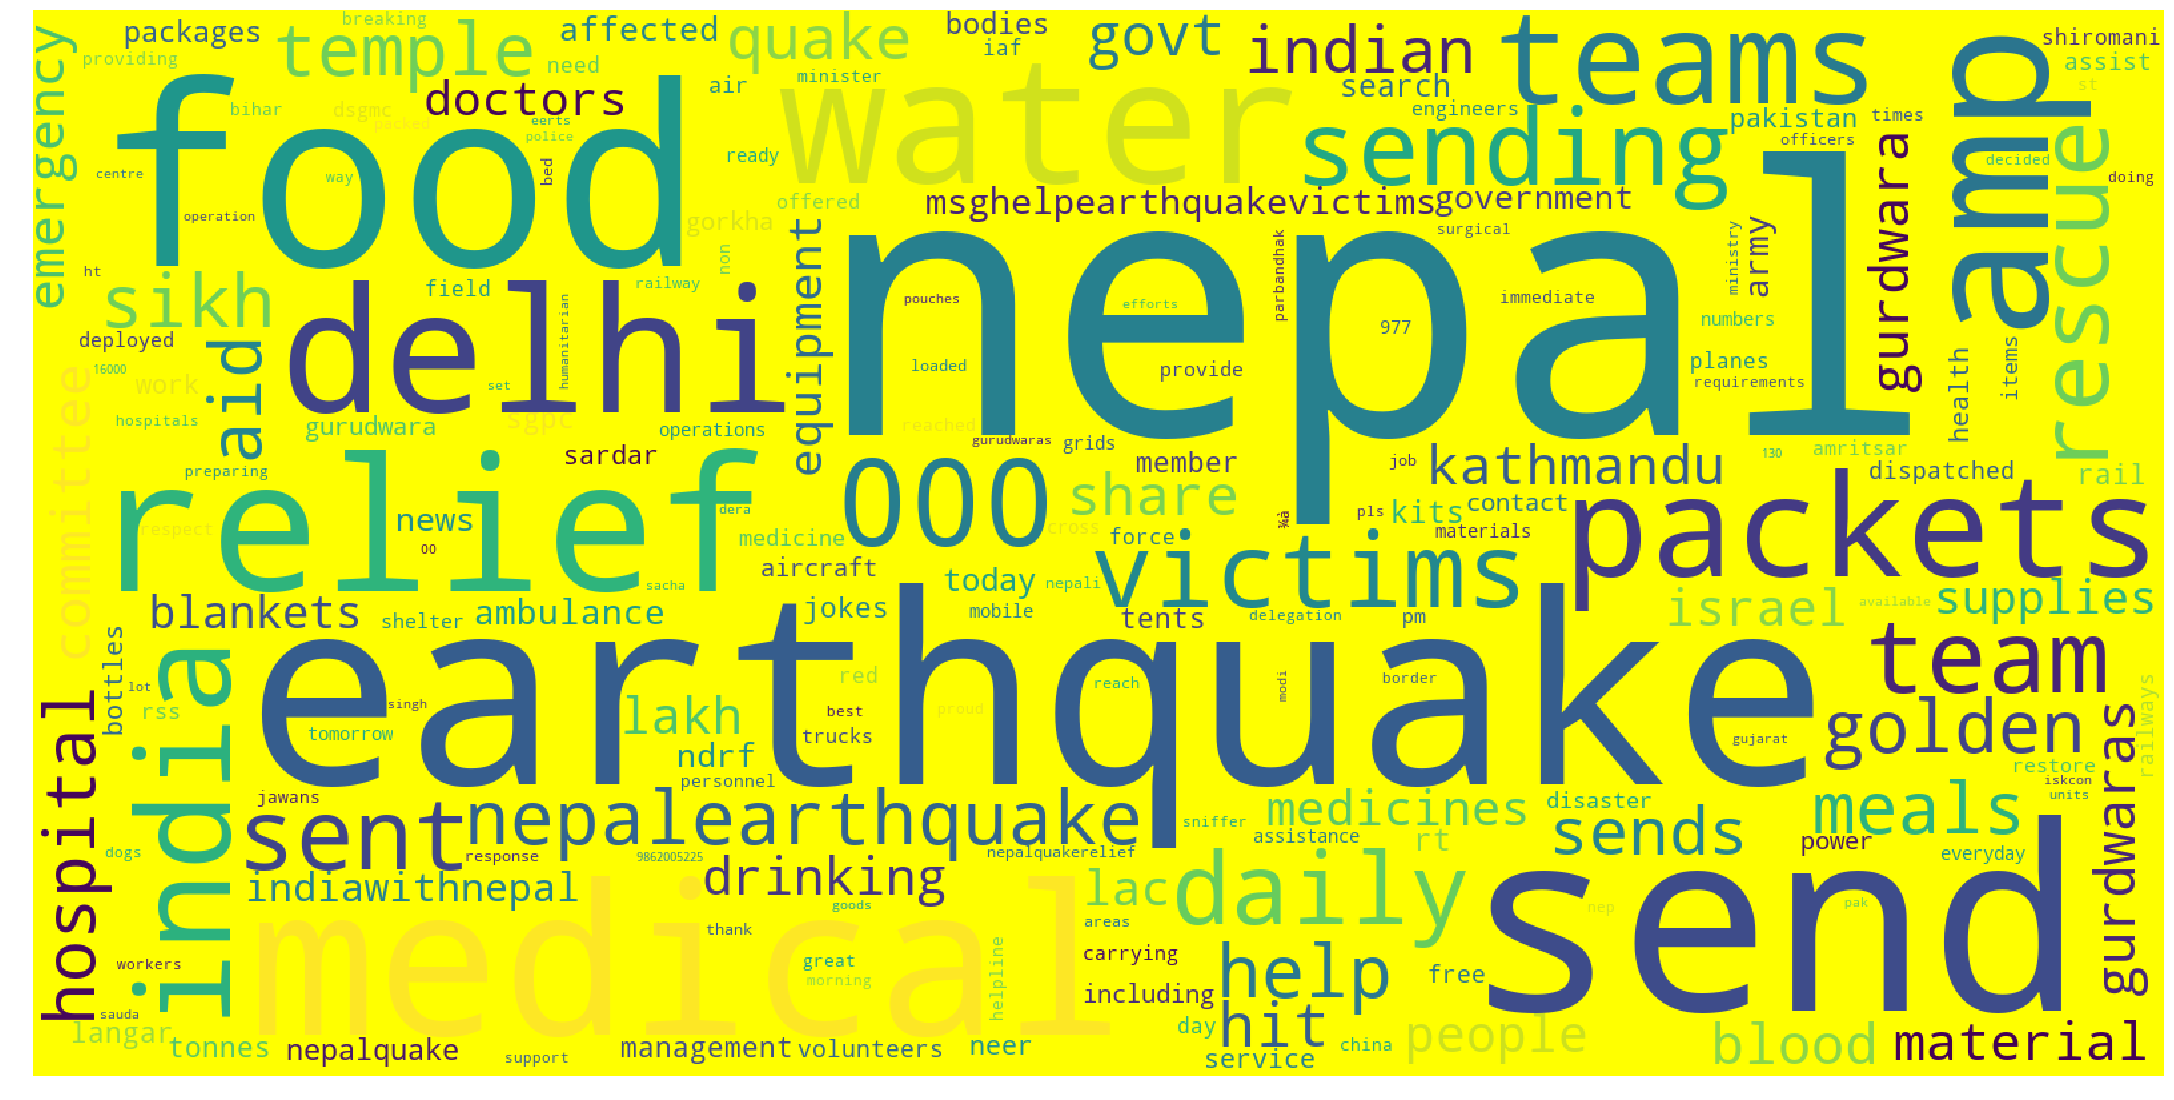

In [28]:
wordcloud=WordCloud(background_color='yellow',
                   width=1600,
                   height=800).generate_from_frequencies(available_result)
fig=plt.figure(figsize=(30,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
fig.savefig("available_wordcloud.png")
plt.show()

<h3>Now we can Analyse that these are the most frequently used words which Helping or providing resources to People</h3>

In [29]:
print(len(irrelevant_df['TweetText']))
print(len(need_df['TweetText']))
print(len(available_df['TweetText']))

17370
199
664


In [30]:
df_2=(df.groupby('TweetClass')['TweetText'].apply(lambda x: np.mean(x.str.len())).reset_index(name='mean_characters_per_tweet'))
print(df_2)

   TweetClass  mean_characters_per_tweet
0           0                  92.656817
1           1                  99.130653
2           2                 103.030120


<h2>
Splitting the Dataset into Train and Test parts using Stratified Shuffle Split Technique.</h2>

In [32]:
x=new_df['TweetText'] #according to text class will be predicted.
y=new_df['TweetClass']


<h1>Using Tf-Idf Vectoriser.</h1><br><br>
TF-IDF is an abbreviation for Term Frequency-Inverse Document Frequency.<br><br>
<h1>TF-IDF for Feature Extraction.</h1>

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(lowercase=True)

dtm = vectorizer.fit_transform(x.values.astype('U'))

<h2>Standardizing data for Feature Transformation</h2>

In [46]:
from sklearn.preprocessing import StandardScaler
StandardScaler(with_mean=False).fit_transform(dtm)

<18233x16853 sparse matrix of type '<class 'numpy.float64'>'
	with 247525 stored elements in Compressed Sparse Row format>

<h1>Using chi squared feature selection for feature selection.</h1>

Feature selection is also known as attribute selection is a process of extracting the most relevant features from the dataset and then applying machine learning algorithms for the better performance of the model. A large number of irrelevant features increases the training time exponentially and increase the risk of overfitting.

In the case of classification problems where input variables are also categorical, we can use statistical tests to determine 
whether the output variable is dependent or independent of the input variables. If independent, then the input variable is
a candidate for a feature that may be irrelevant to the problem and removed from the dataset.




In [47]:
from sklearn.feature_selection import chi2
chi1,p1 = chi2(dtm,y)
print(chi1,p1)

[1.45372356e+01 1.41692857e+02 5.25079205e-02 ... 1.79074405e-02
 3.59951223e-02 3.59951223e-02] [6.97074830e-04 1.70524606e-31 9.74087679e-01 ... 9.91086245e-01
 9.82163428e-01 9.82163428e-01]


<h1>Using stratified shuffled split for the split of skewed data.</h1>


In [48]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
print(sss)
print(sss.get_n_splits(dtm, y))
for train_index, test_index in sss.split(dtm, y):
    x_train, x_test = dtm[train_index], dtm[test_index]
    y_train, y_test = y[train_index], y[test_index]

StratifiedShuffleSplit(n_splits=5, random_state=0, test_size=0.3,
            train_size=None)
5


<h1>Classification Techniques</h1><br>
Printing the following for each classification algorithm:<br></h2>
<h4>1.Accuracy Score<br><br>
2.Confusion Matrix<br><br></h4>

<h1>1.Logistic Regression</h1>

In [49]:
from sklearn.linear_model import LogisticRegression
regressor=LogisticRegression()
regressor.fit(x_train,y_train)
y_pred1=regressor.predict(x_test)

In [50]:
from sklearn.metrics import confusion_matrix , f1_score , accuracy_score
score1=accuracy_score(y_test,y_pred1)
print(score1)

0.9621572212065813


In [51]:
confusion_matrix(y_test,y_pred1)

array([[5196,    0,   15],
       [  56,    0,    4],
       [ 131,    1,   67]], dtype=int64)

<h1>2. Multinomial Naive Bayes</h1>

In [52]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(x_train, y_train)
y_pred2 = nb.predict(x_test)

In [53]:
score2=accuracy_score(y_test,y_pred2)
print(score2)
print(confusion_matrix(y_test,y_pred2))

0.9530164533820841
[[5208    0    3]
 [  60    0    0]
 [ 194    0    5]]


<h1> 3.Support Vector Machine(SVM)</h1>

In [54]:
from sklearn.svm import SVC
li = SVC(kernel='linear')
li.fit(x_train,y_train)
y_pred4 = li.predict(x_test)

In [55]:
score4 = accuracy_score(y_test,y_pred4)
print(score4)
print(confusion_matrix(y_test,y_pred4))

0.9683729433272394
[[5170    4   37]
 [  43   15    2]
 [  84    3  112]]


<h1> 4.Radial Basis Function(RBF)</h1>

In [56]:
from sklearn.svm import SVC
m = SVC(kernel='rbf')
m.fit(x_train,y_train)
y_pred3 = m.predict(x_test)

In [57]:
score3 = accuracy_score(y_test,y_pred3)
print(score3)
print(confusion_matrix(y_test,y_pred3))

0.9526508226691042
[[5211    0    0]
 [  60    0    0]
 [ 199    0    0]]


<h1> 5.Decision Tree(Ginni)</h1>

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini')
dt.fit(x_train,y_train)
y_pred5 = dt.predict(x_test)

In [59]:
score5=accuracy_score(y_test,y_pred5)
print(score5)
print(confusion_matrix(y_test,y_pred5))

0.9572212065813528
[[5101   25   85]
 [  32   20    8]
 [  79    5  115]]


<h1>6. Random Forest(Ginni)</h1>

In [60]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(criterion='gini')
rf.fit(x_train,y_train)
y_pred6 = rf.predict(x_test)

In [61]:
score6=accuracy_score(y_test,y_pred5)
print(score6)
print(confusion_matrix(y_test,y_pred6))

0.9572212065813528
[[5187    5   19]
 [  43   13    4]
 [ 122    2   75]]


<h1>Conclusion</h1><br>
<h3>In this we have Implemented 6 Algorithm and Now we are Comparing These</h3>

In [65]:
import pandas as pd
import seaborn as sns

Accuracy = [score1,score2,score4,score3,score5,score6]

Algo = ['Logistic Regression','Multinomial Naive Bayes','SVM(linear)','SVM(rbf)','Decision Tree','Random Forest']

<h2>Comparison Based On Accuracy</h2>

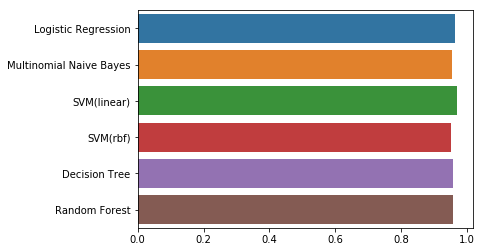

In [66]:
sns.barplot(x=Accuracy,y=Algo)